In [1]:
# Exercise from R for Data Science Chapter 5: Data Transformation
library("tidyverse")
library("palmerpenguins")
library(nycflights13)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [3]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [7]:
#> ::warning FlightFeb28 <- filter(flights, month == 2 | month == 3, day == 28)
(FlightFeb28 <- filter(flights, month %in% c(11, 12), day == 28)) |> head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,11,28,514,515,-1,753,808,-15,UA,1032,N69804,EWR,IAH,197,1400,5,15,2013-11-28 05:00:00
2013,11,28,522,500,22,658,651,7,US,1895,N169UW,EWR,CLT,83,529,5,0,2013-11-28 05:00:00
2013,11,28,538,540,-2,837,850,-13,AA,2243,N639AA,JFK,MIA,157,1089,5,40,2013-11-28 05:00:00
2013,11,28,544,545,-1,825,835,-10,UA,1500,N76516,LGA,IAH,200,1416,5,45,2013-11-28 05:00:00
2013,11,28,545,550,-5,1033,1027,6,B6,939,N636JB,JFK,BQN,211,1576,5,50,2013-11-28 05:00:00
2013,11,28,552,600,-8,853,915,-22,AA,1103,N3LBAA,LGA,DFW,201,1389,6,0,2013-11-28 06:00:00


In [31]:
near(sqrt(2) ^ 2, 2)
names(flights)

[1] TRUE

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

In [1]:
(NovDec <- filter(flights, dep_delay < 30, arr_delay < 30)) |> head()

ERROR: Error in eval(expr, envir, enclos): object 'arr_delay' not found


In [38]:
NA > 5
10 == NA
NA + 10
(x <- NA / 2)
is.na(x)

[1] NA

[1] NA

[1] NA

[1] NA

[1] TRUE

In [2]:
JAS <- filter(flights, arr_delay > 120, 
       # month %in% c(7, 8, 9),
       between(month, 7, 9),
       dest == 'IAH' | dest == 'HOU', 
       carrier == 'UA' | carrier == 'B6'
      )
(JASArrange <- arrange(JAS, month, day, desc(dep_delay))) |> head()

ERROR: Error in between(month, 7, 9): could not find function "between"


In [3]:
# select(JASArrange, month, day, dep_time, dep_delay)
select(JASArrange, 
       (month:dep_delay), 
       -(sched_dep_time), 
       starts_with('arr'), 
       ends_with('hour')
      ) |> head()

ERROR: Error in select(JASArrange, (month:dep_delay), -(sched_dep_time), starts_with("arr"), : could not find function "select"


In [4]:
filter(flights, is.na(dep_time)) |> head()

ERROR: Error in eval(expr, envir, enclos): object 'flights' not found


In [5]:
JASCompact <- select(JASArrange, 
       (month:dep_delay), 
       -(sched_dep_time),
        arr_delay, distance, air_time
      )
# the columns need to be selected to do mutate
# transmute(): same format but will only to keep the new variables
mutate(JASCompact, 
      gain = dep_delay - arr_delay,
      speed = distance / air_time * 60) |> head()

ERROR: Error in select(JASArrange, (month:dep_delay), -(sched_dep_time), arr_delay, : could not find function "select"


In [6]:
transmute(flights, 
          dep_time, 
          hour = dep_time %/% 100,
          minute = dep_time %% 100)  |> head()

ERROR: Error in transmute(flights, dep_time, hour = dep_time%/%100, minute = dep_time%%100): could not find function "transmute"


In [80]:
y <- c(NA, 2, 3, 1, 3, 4)
min_rank(y)
min_rank(desc(y))
# this is useless

[1] NA  2  3  1  3  5

[1] NA  4  2  5  2  1

In [7]:
byDay <- group_by(flights, year, month)
# summarise(byDay, delay = mean(dep_delay, na.rm = TRUE), count = n())
summarise(flights, delay = mean(dep_delay, na.rm = TRUE), count = n(), groups = c(year, month))  |> head()

ERROR: Error in group_by(flights, year, month): could not find function "group_by"


In [10]:
# #1 Way to write it
# byDay <- group_by(flights, year, month)
#summarise(byDay, delay = mean(dep_delay, na.rm = TRUE), count = n())

# #2 way to write it
#flights %>% 
#    group_by(year, month) %>%
#        summarise(
#            delay = mean(dep_delay, na.rm = TRUE),
#            count = n()
#        )

# #3 way to write it
flights |> 
    group_by(year, month) |> 
    summarise(delay = mean(dep_delay, na.rm = TRUE), count = n())

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


year,month,delay,count
<int>,<int>,<dbl>,<int>
2013,1,10.036665,27004
2013,2,10.816843,24951
2013,3,13.227076,28834
2013,4,13.938038,28330
2013,5,12.986859,28796
2013,6,20.846332,28243
2013,7,21.727787,29425
2013,8,12.611040,29327
2013,9,6.722476,27574


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


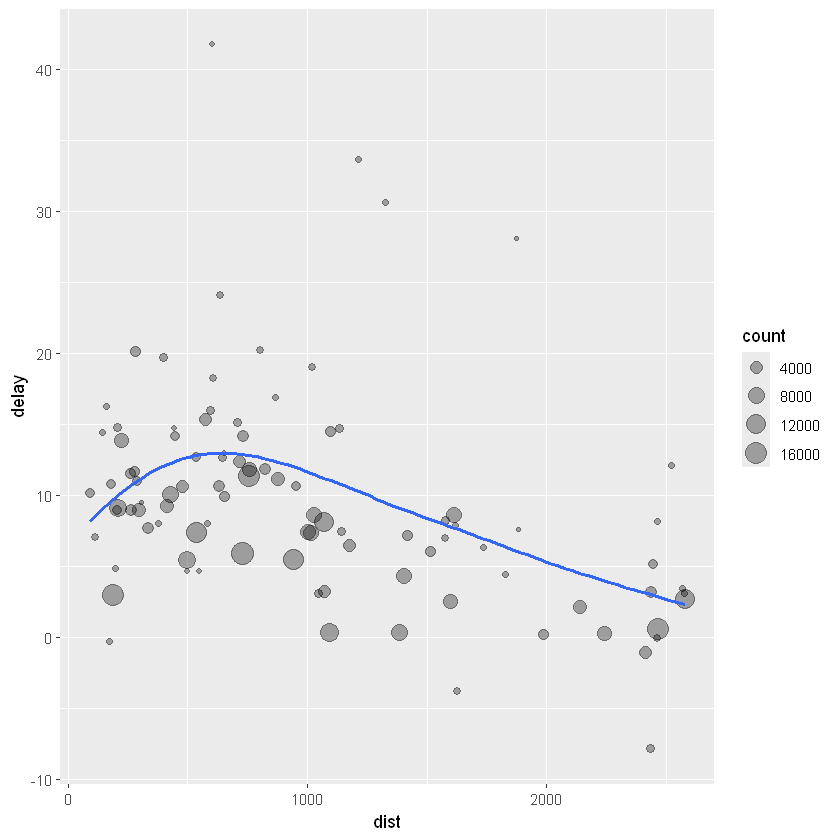

In [12]:
FlightsGraph <- flights |>
    group_by(dest) |>
    summarise(
                count = n(),
                dist = mean(distance, na.rm = TRUE),
                delay = mean(arr_delay, na.rm = TRUE)
             ) |>
    filter(count > 20, dest != 'HNL')

ggplot(FlightsGraph, mapping = aes(x = dist, y = delay)) + 
        geom_point(aes(size = count), alpha = 1/3) +
        geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


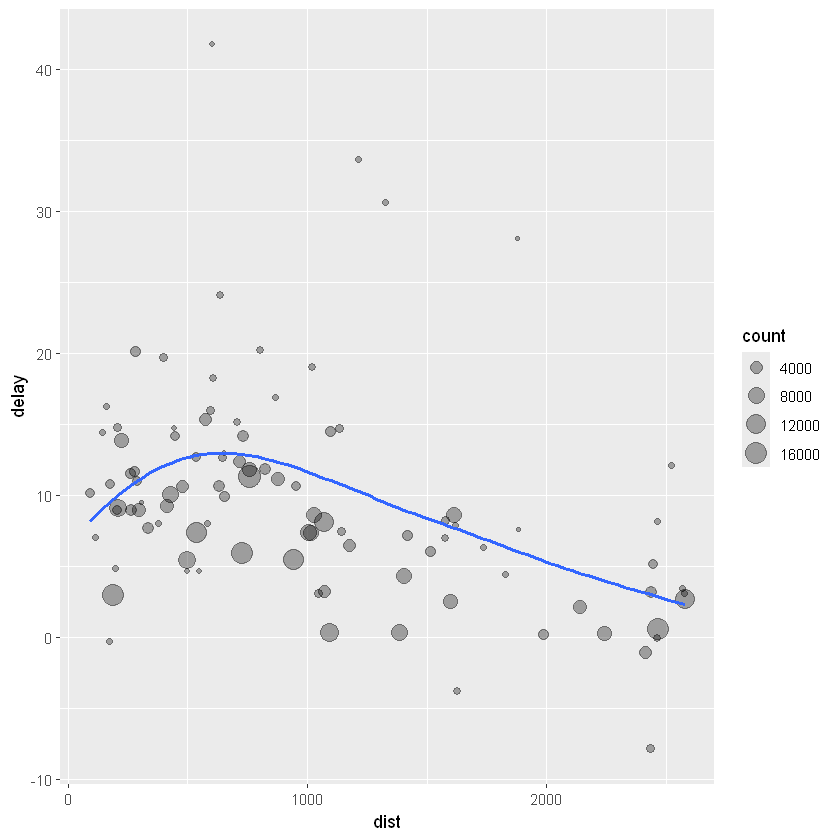

In [22]:
# HOW TO WRITE IT WITHOUT USING na.rm = TRUE
FlightsGraph <- flights |>
    filter(! is.na(distance), ! is.na(arr_delay), ! is.na(dep_delay)) |>
    group_by(dest) |>
    summarise(
                count = n(),
                dist = mean(distance),
                delay = mean(arr_delay)
             ) |>
    filter(count > 20, dest != 'HNL')
    

ggplot(FlightsGraph, mapping = aes(x = dist, y = delay)) + 
        geom_point(aes(size = count), alpha = 1/3) +
        geom_smooth(se = FALSE)

In [8]:
# HOW TO WRITE IT WITHOUT USING na.rm = TRUE, GROUP_BY DIFF VARIABLES 
FlightsGraph <- flights |>
    filter(! is.na(distance), ! is.na(arr_delay), ! is.na(dep_delay)) |>
    group_by(year, month, carrier) |>
    summarise( depDelay = mean(dep_delay) ) |>
    arrange(year, month, desc(depDelay))
FlightsGraph  |> head()

ERROR: Error in arrange(summarise(group_by(filter(flights, !is.na(distance), : could not find function "arrange"


In [35]:
# HOW TO WRITE IT WITHOUT USING na.rm = TRUE, GROUP_BY DIFF VARIABLES 
FlightsGraph <- flights |>
    filter(! is.na(distance), ! is.na(arr_delay), ! is.na(dep_delay)) |>
    group_by(year, month) |>
    summarise( meanDepDelay = mean(dep_delay), Count = n() ) |>
    arrange(year, month)
FlightsGraph

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


year,month,meanDepDelay,Count
<int>,<int>,<dbl>,<int>
2013,1,9.985491,26398
2013,2,10.760239,23611
2013,3,13.164289,27902
2013,4,13.849187,27564
2013,5,12.891709,28128
2013,6,20.725614,27075
2013,7,21.522179,28293
2013,8,12.570524,28756
2013,9,6.630285,27010


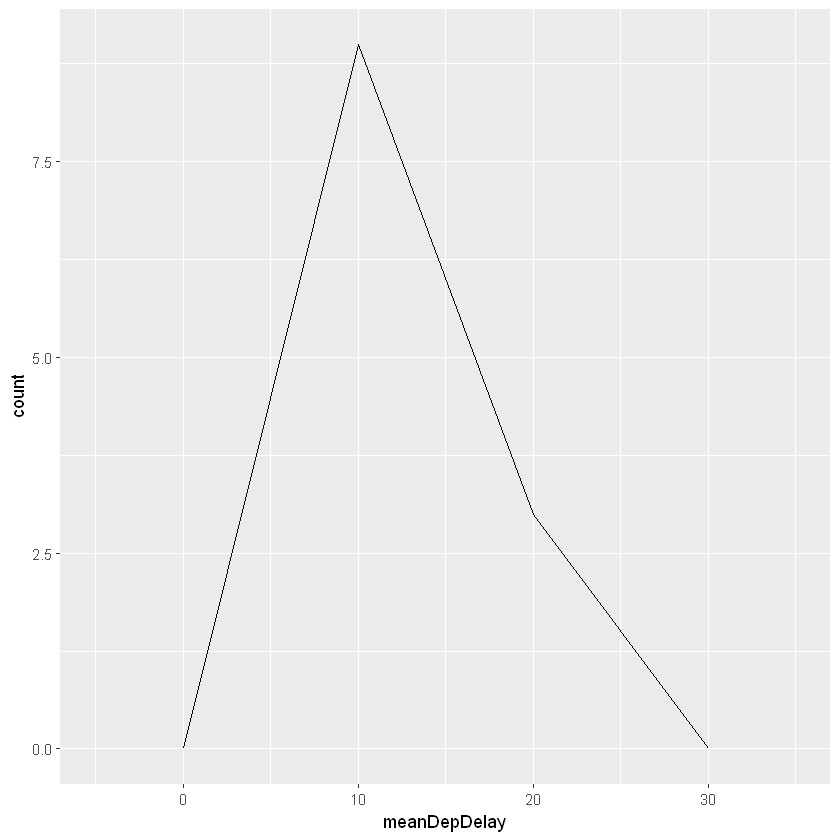

In [43]:
ggplot(data = FlightsGraph, mapping = aes(x = meanDepDelay)) +
      geom_freqpoly(binwidth = 10)